# NASA Space Apps 2025: Hunting Exoplanets

## Loading the TESS Dataset

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

url = "https://raw.githubusercontent.com/mohammadsammour/Nasa-Challenge/main/Nasa_Dataset_1.csv"
main_data = pd.read_csv(url)
pd.set_option('display.max_columns', None) # to show all columns
pd.set_option('display.width', None) # each row will be shown in a line
main_data.head()

,toi,tid,tfopwg_disp,rastr,ra,decstr,dec,st_pmra,st_pmraerr1,st_pmraerr2,st_pmralim,st_pmdec,st_pmdecerr1,st_pmdecerr2,st_pmdeclim,pl_tranmid,pl_tranmiderr1,pl_tranmiderr2,pl_tranmidlim,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_trandurh,pl_trandurherr1,pl_trandurherr2,pl_trandurhlim,pl_trandep,pl_trandeperr1,pl_trandeperr2,pl_trandeplim,pl_rade,pl_radeerr1,pl_radeerr2,pl_radelim,pl_insol,pl_insolerr1,pl_insolerr2,pl_insollim,pl_eqt,pl_eqterr1,pl_eqterr2,pl_eqtlim,st_tmag,st_tmagerr1,st_tmagerr2,st_tmaglim,st_dist,st_disterr1,st_disterr2,st_distlim,st_teff,st_tefferr1,st_tefferr2,st_tefflim,st_logg,st_loggerr1,st_loggerr2,st_logglim,st_rad,st_raderr1,st_raderr2,st_radlim,toi_created,rowupdate
0,1000.01,50365310,FP,07h29m25.85s,112.357708,-12d41m45.46s,-12.695960,-5.964,0.085,-0.085,0.0,-0.076,0.072,-0.072,0.0,2.459230e+06,0.001657,-0.001657,0,2.171348,0.000264,-0.000264,0,2.01722,0.319588,-0.319588,0,656.886099,37.778210,-37.778210,0,5.818163,1.910546,-1.910546,0,22601.948581,NaN,NaN,NaN,3127.204052,NaN,NaN,NaN,9.604000,0.013,-0.013,0,485.735,11.9515,-11.9515,0,10249.0,264.7,-264.7,0,4.19,0.07,-0.07,0,2.16986,0.072573,-0.072573,0,2019-07-24 15:58:33,2024-09-09 10:08:01
1,1001.01,88863718,PC,08h10m19.31s,122.580465,-05d30m49.87s,-5.513852,-4.956,0.102,-0.102,0.0,-15.555,0.072,-0.072,0.0,2.459988e+06,0.001916,-0.001916,0,1.931646,0.000005,-0.000005,0,3.16600,0.647000,-0.647000,0,1286.000000,1186.490000,-1186.490000,0,11.215400,2.624200,-2.624200,0,44464.500000,NaN,NaN,NaN,4045.000000,NaN,NaN,NaN,9.423440,0.006,-0.006,0,295.862,5.9100,-5.9100,0,7070.0,126.4,-126.4,0,4.03,0.09,-0.09,0,2.01000,0.090000,-0.090000,0,2019-07-24 15:58:33,2023-04-03 14:31:04
2,1002.01,124709665,FP,06h58m54.47s,104.726966,-10d34m49.64s,-10.580455,-1.462,0.206,-0.206,0.0,-2.249,0.206,-0.206,0.0,2.459225e+06,0.000625,-0.000625,0,1.867557,0.000003,-0.000003,0,1.40800,0.184000,-0.184000,0,1500.000000,1.758400,-1.758400,0,23.752900,NaN,NaN,0,2860.610000,NaN,NaN,NaN,2037.000000,NaN,NaN,NaN,9.299501,0.058,-0.058,0,943.109,106.3330,-106.3330,0,8924.0,124.0,-124.0,0,NaN,NaN,NaN,0,5.73000,NaN,NaN,0,2019-07-24 15:58:33,2022-07-11 16:02:02
3,1003.01,106997505,FP,07h22m14.39s,110.559945,-25d12m25.26s,-25.207017,-0.939,0.041,-0.041,0.0,1.640,0.055,-0.055,0.0,2.458493e+06,0.005350,-0.005350,0,2.743230,0.001080,-0.001080,0,3.16700,0.642000,-0.642000,0,383.410000,0.781988,-0.781988,0,NaN,NaN,NaN,0,1177.360000,NaN,NaN,NaN,1631.000000,NaN,NaN,NaN,9.300300,0.037,-0.037,0,7728.170,1899.5700,-1899.5700,0,5388.5,567.0,-567.0,0,4.15,1.64,-1.64,0,NaN,NaN,NaN,0,2019-07-24 15:58:33,2022-02-23 10:10:02
4,1004.01,238597883,FP,08h08m42.77s,122.178195,-48d48m10.12s,-48.802811,-4.496,0.069,-0.069,0.0,9.347,0.062,-0.062,0.0,2.459987e+06,0.003748,-0.003748,0,3.573014,0.000013,-0.000013,0,3.37000,1.029000,-1.029000,0,755.000000,1306.550000,-1306.550000,0,11.311300,3.247140,-3.247140,0,54679.300000,NaN,NaN,NaN,4260.000000,NaN,NaN,NaN,9.135500,0.006,-0.006,0,356.437,4.6175,-4.6175,0,9219.0,171.1,-171.1,0,4.14,0.07,-0.07,0,2.15000,0.060000,-0.060000,0,2019-07-24 15:58:33,2024-09-09 10:08:01


In [2]:
print(main_data.shape)
print(main_data.isna().sum().sum())
print(main_data.info())

(7668, 65)
64248
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 65 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   toi              7668 non-null   float64
 1   tid              7668 non-null   int64  
 2   tfopwg_disp      7668 non-null   object 
 3   rastr            7668 non-null   object 
 4   ra               7668 non-null   float64
 5   decstr           7668 non-null   object 
 6   dec              7668 non-null   float64
 7   st_pmra          7534 non-null   float64
 8   st_pmraerr1      7534 non-null   float64
 9   st_pmraerr2      7534 non-null   float64
 10  st_pmralim       7534 non-null   float64
 11  st_pmdec         7534 non-null   float64
 12  st_pmdecerr1     7534 non-null   float64
 13  st_pmdecerr2     7534 non-null   float64
 14  st_pmdeclim      7534 non-null   float64
 15  pl_tranmid       7668 non-null   float64
 16  pl_tranmiderr1   7657 non-null   float64
 1

## Data Preprocessing

In [3]:
main_data = main_data.drop(columns=['rastr','decstr','toi','tid','toi_created','rowupdate'])

In [4]:
def handling_missing(df):
     df = df.dropna(axis=1, thresh=len(df)*0.4)
     df = df.drop(columns=(df == 0).mean()[ (df == 0).mean() >= 0.9 ].index)
     df = df.dropna()
     return df

In [5]:
def drop_sym_columns(df, threshold=0.95):
    numerical_df = df.select_dtypes(['int','float'])
    numerical_columns = numerical_df.columns
    corr_matrix = numerical_df.corr()
    drop_columns = set()
    corr_matrix = abs(corr_matrix)
    for i in range(len(corr_matrix.index)):
        for j in range(i,len(corr_matrix.index)):
            if corr_matrix.iloc[i,j] > threshold and corr_matrix.index[i] != corr_matrix.columns[j]:
                drop_columns.add(numerical_columns[j])
    print(list(drop_columns))
    print(numerical_df.corr().to_string())
    return df.drop(columns = list(drop_columns))

In [6]:
def splitting_data(df,test_size):
    X = df.drop(columns=["tfopwg_disp"])
    Y = df['tfopwg_disp']

    x_train,x_test,y_train,y_test = train_test_split(X, Y, test_size = test_size, random_state = 42)
    return x_train,x_test,y_train,y_test

In [7]:
def encoding_cate_columns2(y_train, y_test):
    LE = LabelEncoder()
    y_train_enc = LE.fit_transform(y_train)
    y_test_enc = LE.transform(y_test)
    decoded_labels = LE.inverse_transform(y_train_enc)
    print("Mapping:", dict(zip(LE.classes_, LE.transform(LE.classes_))))
    return y_train_enc, y_test_enc


def encode_dataframe_categoricals(df):
    df = df.copy()
    cat_cols = df.select_dtypes(include='object').columns
    for col in cat_cols:
        df.loc[:, col] = df[col].astype('category').cat.codes
    return df

In [8]:
def scaling_columns(x_train,x_test):
    x_train_min = np.min(x_train,axis=0)
    x_train_max = np.max(x_train,axis = 0)
    x_train[:] = (x_train-x_train_min)/(x_train_max-x_train_min)
    x_test[:] = (x_test-x_train_min)/(x_train_max-x_train_min)
    return x_train, x_test

In [9]:
def feature_selection(x_train,y_train,x_test):

    from sklearn.feature_selection import RFECV
    from sklearn.ensemble import RandomForestClassifier
    est = RandomForestClassifier(n_estimators=200, random_state=42)
    rfecv = RFECV(
        estimator=est,
        step=1,               # remove one feature at a time
        cv=5,                 # cross-validation folds
        scoring="f1_macro",    # metric
        n_jobs=-1
    )
    rfecv.fit(x_train, y_train)

    selected_cols = x_train.columns[rfecv.support_]
    print("Optimal number of features:", len(selected_cols))
    print("Selected features:", selected_cols.tolist())

    x_train = x_train[selected_cols]
    x_test = x_test[selected_cols]
    return x_train,x_test

### Calling Preprocessing Functions

In [10]:
main_data = handling_missing(main_data)
main_data = drop_sym_columns(main_data, 0.95)
x_train,x_test,y_train,y_test = splitting_data(main_data,0.2)
y_train,y_test = encoding_cate_columns2(y_train,y_test)
x_train,x_test = feature_selection(x_train,y_train,x_test)

['st_loggerr2', 'st_raderr2', 'st_tefferr2', 'st_tmagerr2', 'pl_tranmiderr2', 'st_disterr2', 'pl_trandurherr2', 'pl_trandeperr2', 'st_pmraerr2', 'pl_orbpererr2', 'st_pmdecerr2', 'pl_radeerr2']
                       ra       dec   st_pmra  st_pmraerr1  st_pmraerr2  st_pmdec  st_pmdecerr1  st_pmdecerr2  pl_tranmid  pl_tranmiderr1  pl_tranmiderr2  pl_orbper  pl_orbpererr1  pl_orbpererr2  pl_trandurh  pl_trandurherr1  pl_trandurherr2  pl_trandep  pl_trandeperr1  pl_trandeperr2   pl_rade  pl_radeerr1  pl_radeerr2  pl_insol    pl_eqt   st_tmag  st_tmagerr1  st_tmagerr2   st_dist  st_disterr1  st_disterr2   st_teff  st_tefferr1  st_tefferr2   st_logg  st_loggerr1  st_loggerr2    st_rad  st_raderr1  st_raderr2
ra               1.000000  0.206753 -0.014470    -0.083651     0.083651  0.032255     -0.051618      0.051618    0.197575        0.017801       -0.017801  -0.014639      -0.014814       0.014814     0.010715         0.023134        -0.023134    0.023249        0.035841       -0.035841  

### Quick check on changes

In [11]:
print(main_data.shape)
print(main_data.isna().sum().sum())
print(x_train.shape)

(5124, 29)
0
(4099, 18)


In [ ]:
print(f"Best Features: \n{len(x_train.columns)} Features: {list(x_train.columns)}\n")

Best Features: 
 18 Features: ['dec', 'st_pmdec', 'pl_tranmid', 'pl_tranmiderr1', 'pl_orbper', 'pl_orbpererr1', 'pl_trandurh', 'pl_trandurherr1', 'pl_trandep', 'pl_trandeperr1', 'pl_rade', 'pl_radeerr1', 'pl_insol', 'pl_eqt', 'st_tmag', 'st_dist', 'st_disterr1', 'st_tefferr1']



## Training and Evaluation

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

lr = LogisticRegression(max_iter=500)
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

print("Logistic Regression")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Logistic Regression
Accuracy: 0.5990243902439024
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        53
           1       0.00      0.00      0.00       123
           2       0.00      0.00      0.00        15
           3       0.79      0.09      0.16       165
           4       0.00      0.00      0.00        67
           5       0.60      1.00      0.75       602

    accuracy                           0.60      1025
   macro avg       0.23      0.18      0.15      1025
weighted avg       0.48      0.60      0.46      1025



C:\Users\m1-ra\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\m1-ra\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\m1-ra\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: P

Best k: 43


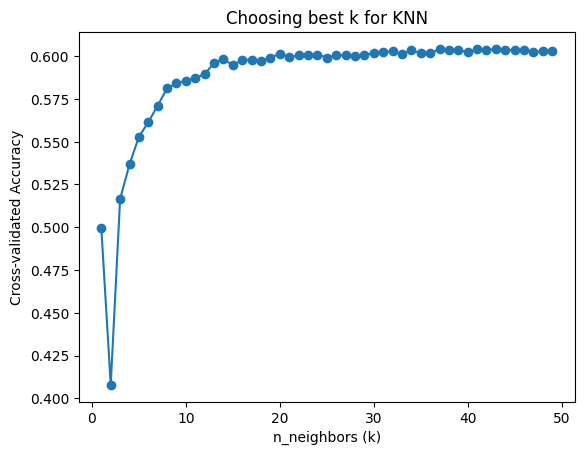

Best k: 43 with Accuracy: 0.6042901813633521


In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

neighbors = range(1, 50)
scores = []

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    cv_score = cross_val_score(knn, x_train, y_train, cv=5, scoring="accuracy")
    scores.append(cv_score.mean())

best_k = neighbors[np.argmax(scores)]
print("Best k:", best_k)

plt.plot(neighbors, scores, marker='o')
plt.xlabel("n_neighbors (k)")
plt.ylabel("Cross-validated Accuracy")
plt.title("Choosing best k for KNN")
plt.show()
print("Best k:", best_k, "with Accuracy:", max(scores))


In [15]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=43)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

print("KNN with k=43")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

KNN with k=43
Accuracy: 0.6126829268292683
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        53
           1       0.33      0.01      0.02       123
           2       0.00      0.00      0.00        15
           3       0.57      0.27      0.37       165
           4       0.00      0.00      0.00        67
           5       0.62      0.97      0.75       602

    accuracy                           0.61      1025
   macro avg       0.25      0.21      0.19      1025
weighted avg       0.49      0.61      0.50      1025



C:\Users\m1-ra\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\m1-ra\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\m1-ra\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

dt = DecisionTreeClassifier(criterion="entropy", random_state=42)
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)

print("Decision Tree (ID3)")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Decision Tree (ID3)
Accuracy: 0.5346341463414634
              precision    recall  f1-score   support

           0       0.16      0.19      0.17        53
           1       0.33      0.29      0.31       123
           2       0.00      0.00      0.00        15
           3       0.44      0.42      0.43       165
           4       0.26      0.33      0.29        67
           5       0.68      0.68      0.68       602

    accuracy                           0.53      1025
   macro avg       0.31      0.32      0.31      1025
weighted avg       0.54      0.53      0.53      1025



In [17]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

svm = SVC()
svm.fit(x_train, y_train)
y_pred = svm.predict(x_test)

print("SVM")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

SVM
Accuracy: 0.5873170731707317
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        53
           1       0.00      0.00      0.00       123
           2       0.00      0.00      0.00        15
           3       0.00      0.00      0.00       165
           4       0.00      0.00      0.00        67
           5       0.59      1.00      0.74       602

    accuracy                           0.59      1025
   macro avg       0.10      0.17      0.12      1025
weighted avg       0.34      0.59      0.43      1025



C:\Users\m1-ra\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\m1-ra\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\m1-ra\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

rf = RandomForestClassifier(random_state=42)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)

print("Random Forest")
from sklearn.metrics import recall_score, precision_score, f1_score
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Recall (macro):", recall_score(y_test, y_pred, average='macro'))
print("Precision (macro):", precision_score(y_test, y_pred, average='macro'))
print("F1 Score (macro):", f1_score(y_test, y_pred, average='macro'))

Random Forest
Accuracy: 0.6839024390243903
Recall (macro): 0.33872242117536794
Precision (macro): 0.497393047006449
F1 Score (macro): 0.3742783620571008


C:\Users\m1-ra\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score,recall_score

gb = GradientBoostingClassifier(random_state=42)
gb.fit(x_train, y_train)
y_pred = gb.predict(x_test)

print("Gradient Boosting")
from sklearn.metrics import recall_score, precision_score, f1_score

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Recall (macro):", recall_score(y_test, y_pred, average='macro'))
print("Precision (macro):", precision_score(y_test, y_pred, average='macro'))
print("F1 Score (macro):", f1_score(y_test, y_pred, average='macro'))


Gradient Boosting
Accuracy: 0.6809756097560976
Recall (macro): 0.3826475077773275
Precision (macro): 0.5491432439057424
F1 Score (macro): 0.42911410093570107


#### The best model is the Gradient Boosting Classifier based on the evaluation metrics above.

## Saving the model

In [27]:
import joblib
joblib.dump(gb, "model.joblib")
print("✅ Model saved as model.joblib")

✅ Model saved as model.joblib
